In [0]:
# Do not delete or change this cell

# grading import statements
%matplotlib inline
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

# Define a function to determine if we are running on data bricks
# Return true if running in the data bricks environment, false otherwise
def is_databricks():
    # get the databricks runtime version
    db_env = os.getenv("DATABRICKS_RUNTIME_VERSION")
    
    # if running on data bricks
    if db_env != None:
        return True
    else:
        return False

# Define a function to read the data file.  The full path data file name is constructed
# by checking runtime environment variables to determine if the runtime environment is 
# databricks, or a student's personal computer.  The full path file name is then
# constructed based on the runtime env.
# 
# Params
#   data_file_name: The base name of the data file to load
# 
# Returns the full path file name based on the runtime env
#
# Correct Usage Example (pass ONLY the full file name):
#   file_name_to_load = get_training_filename("sms_spam.csv") # correct - pass ONLY the full file name  
#   
# Incorrect Usage Example
#   file_name_to_load = get_training_filename("/sms_spam.csv") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("sms_spam.csv/") # incorrect - pass ONLY the full file name
#   file_name_to_load = get_training_filename("c:/users/will/data/sms_spam.csv") incorrect -pass ONLY the full file name
def get_training_filename(data_file_name):    
    # if running on data bricks
    if is_databricks():
        # build the full path file name assuming data brick env
        full_path_name = "dbfs:/FileStore/tables/%s" % data_file_name
    # else the data is assumed to be in the same dir as this notebook
    else:
        # Assume the student is running on their own computer and load the data
        # file from the same dir as this notebook
        full_path_name = data_file_name
    
    # return the full path file name to the caller
    return full_path_name

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.ml import feature
from pyspark.ml import classification
from pyspark.sql import functions as fn

In [0]:
vehicle_df = spark.read.csv(get_training_filename('vehicles.csv'), header=True, inferSchema=True)

In [0]:
vehicle_df.show()

+------------------+----------+---------+---------+------+-------+-------+--------+------+-----+------+---+----+---------------+------------------+------+-------+-------+--------+-----+----------+----------+---------+-----+--------------------+-----+----------+-------+----------+-----------+--------+----------------+--------+---------+---------+----------+----------+-----------+---------+--------+---------+---+---+-----+---+---+----------+-------------------+-------+-----------+---+---+-----+---------+----------+--------+---------+---------------+-------+------+--------+---------+---------------+----+------------+-------+-----------+--------+--------+-------+---------+------+-------+-------+--------+----------+---------+--------------------+--------------------+---------+--------+-------+--------+
 barrels08|barrelsA08|charge120|charge240|city08|city08U|cityA08|cityA08U|cityCD|cityE|cityUF|co2|co2A|co2TailpipeAGpm| co2TailpipeGpm|comb08|comb08U|combA08|combA08U|combE|combinedCD|combinedUF|cylinders|displ| drive|engId| eng_dscr|feScore|fuelCost08|fuelCostA08|fuelType| fuelType1|ghgScore|ghgScoreA|highway08|highway08U|highwayA08|highwayA08U|highwayCD|highwayE|highwayUF|hlv|hpv| id|lv2|lv4| make| model|mpgData|phevBlended|pv2|pv4|range|rangeCity|rangeCityA|rangeHwy|rangeHwyA| trany| UCity|UCityA|UHighway|UHighwayA| VClass|year|youSaveSpend|guzzler| trans_dscr|tCharger|sCharger|atvType|fuelType2|rangeA|evMotor|mfrCode|c240Dscr|charge240b|c240bDscr| createdOn| modifiedOn|startStop|phevCity|phevHwy|phevComb|
+------------------+----------+---------+---------+------+-------+-------+--------+------+-----+------+---+----+---------------+------------------+------+-------+-------+--------+-----+----------+----------+---------+-----+--------------------+-----+----------+-------+----------+-----------+--------+----------------+--------+---------+---------+----------+----------+-----------+---------+--------+---------+---+---+-----+---+---+----------+-------------------+-------+-----------+---+---+-----+---------+----------+--------+---------+---------------+-------+------+--------+---------+---------------+----+------------+-------+-----------+--------+--------+-------+---------+------+-------+-------+--------+----------+---------+--------------------+--------------------+---------+--------+-------+--------+
15.695714285714287| 0.0| 0.0| 0.0| 19| 0.0| 0| 0.0| 0.0| 0.0| 0.0| -1| -1| 0.0| 423.1904761904762| 21| 0.0| 0| 0.0| 0.0| 0.0| 0.0| 4| 2.0| Rear-Wheel Drive| 9011| (FFS)| -1| 1500| 0| Regular|Regular Gasoline| -1| -1| 25| 0.0| 0| 0.0| 0.0| 0.0| 0.0| 0| 0| 1| 0| 0|Alfa Romeo| Spider Veloce 2000| Y| false| 0| 0| 0| 0.0| 0.0| 0.0| 0.0| Manual 5-spd|23.3333| 0.0| 35.0| 0.0| Two Seaters|1985| -1750| null| null| null| null| null| null| null| null| null| null| 0.0| null|Tue Jan 01 00:00:...|Tue Jan 01 00:00:...| null| 0| 0| 0|
 29.96454545454546| 0.0| 0.0| 0.0| 9| 0.0| 0| 0.0| 0.0| 0.0| 0.0| -1| -1| 0.0| 807.9090909090909| 11| 0.0| 0| 0.0| 0.0| 0.0| 0.0| 12| 4.9| Rear-Wheel Drive|22020| (GUZZLER)| -1| 2850| 0| Regular|Regular Gasoline| -1| -1| 14| 0.0| 0| 0.0| 0.0| 0.0| 0.0| 0| 0| 10| 0| 0| Ferrari| Testarossa| N| false| 0| 0| 0| 0.0| 0.0| 0.0| 0.0| Manual 5-spd| 11.0| 0.0| 19.0| 0.0| Two Seaters|1985| -8500| T| null| null| null| null| null| null| null| null| null| 0.0| null|Tue Jan 01 00:00:...|Tue Jan 01 00:00:...| null| 0| 0| 0|
12.207777777777778| 0.0| 0.0| 0.0| 23| 0.0| 0| 0.0| 0.0| 0.0| 0.0| -1| -1| 0.0|329.14814814814815| 27| 0.0| 0| 0.0| 0.0| 0.0| 0.0| 4| 2.2| Front-Wheel Drive| 2100| (FFS)| -1| 1150| 0| Regular|Regular Gasoline| -1| -1| 33| 0.0| 0| 0.0| 0.0| 0.0| 0.0| 19| 77| 100| 0| 0| Dodge| Charger| Y| false| 0| 0| 0| 0.0| 0.0| 0.0| 0.0| Manual 5-spd| 29.0| 0.0| 47.0| 0.0|Subcompact Cars|1985| 0| null| SIL| null| null| null| null| null| null| null| null| 0.0| null|Tue Jan 01 00:00:...|Tue Jan 01 00:00:...| null| 0| 0| 0|
 29.96454545454546| 0.0| 0.0| 0.0| 10| 0.0| 0| 0.0| 0.0| 0.0| 0.0| -1| -1| 0.0| 807.9090909090909| 11| 0.0| 0| 0

# **Data Preparation**

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.ml import feature
from pyspark.ml import classification
from pyspark.sql import functions as fn
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import feature, regression, evaluation, Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, \
    MulticlassClassificationEvaluator, \
    RegressionEvaluator

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)
import os

In [0]:
sample_df = vehicle_df.select("barrels08","displ","city08","comb08","highway08",
         "fuelCost08","cylinders","make","model","fuelType","co2TailpipeGpm",
         "trany","VClass","year", "youSaveSpend")
sample_df.show()
sample_df.toPandas().shape

+------------------+-----+------+------+---------+----------+---------+----------+-------------------+--------+------------------+---------------+---------------+----+------------+
 barrels08|displ|city08|comb08|highway08|fuelCost08|cylinders| make| model|fuelType| co2TailpipeGpm| trany| VClass|year|youSaveSpend|
+------------------+-----+------+------+---------+----------+---------+----------+-------------------+--------+------------------+---------------+---------------+----+------------+
15.695714285714287| 2.0| 19| 21| 25| 1500| 4|Alfa Romeo| Spider Veloce 2000| Regular| 423.1904761904762| Manual 5-spd| Two Seaters|1985| -1750|
 29.96454545454546| 4.9| 9| 11| 14| 2850| 12| Ferrari| Testarossa| Regular| 807.9090909090909| Manual 5-spd| Two Seaters|1985| -8500|
12.207777777777778| 2.2| 23| 27| 33| 1150| 4| Dodge| Charger| Regular|329.14814814814815| Manual 5-spd|Subcompact Cars|1985| 0|
 29.96454545454546| 5.2| 10| 11| 12| 2850| 8| Dodge|B150/B250 Wagon 2WD| Regular| 807.9090909090909|Automatic 3-spd| Vans|1985| -8500|
17.347894736842107| 2.2| 17| 19| 23| 2150| 4| Subaru| Legacy AWD Turbo| Premium| 467.7368421052632| Manual 5-spd| Compact Cars|1993| -5000|
 14.98227272727273| 1.8| 21| 22| 24| 1450| 4| Subaru| Loyale| Regular|403.95454545454544|Automatic 3-spd| Compact Cars|1993| -1500|
 13.1844| 1.8| 22| 25| 29| 1250| 4| Subaru| Loyale| Regular| 355.48| Manual 5-spd| Compact Cars|1993| -500|
 13.73375| 1.6| 23| 24| 26| 1300| 4| Toyota| Corolla| Regular| 370.2916666666667|Automatic 3-spd| Compact Cars|1993| -750|
12.677307692307693| 1.6| 23| 26| 31| 1200| 4| Toyota| Corolla| Regular| 341.8076923076923| Manual 5-spd| Compact Cars|1993| -250|
 13.1844| 1.8| 23| 25| 30| 1250| 4| Toyota| Corolla| Regular| 355.48|Automatic 4-spd| Compact Cars|1993| -500|
12.677307692307693| 1.8| 23| 26| 30| 1200| 4| Toyota| Corolla| Regular| 341.8076923076923| Manual 5-spd| Compact Cars|1993| -250|
15.695714285714287| 2.0| 18| 21| 26| 1500| 4|Volkswagen| Golf III / GTI| Regular| 423.1904761904762|Automatic 4-spd| Compact Cars|1993| -1750|
 13.73375| 2.0| 21| 24| 29| 1300| 4|Volkswagen| Golf III / GTI| Regular| 370.2916666666667| Manual 5-spd| Compact Cars|1993| -750|
15.695714285714287| 2.0| 18| 21| 26| 1500| 4|Volkswagen| Jetta III| Regular| 423.1904761904762|Automatic 4-spd| Compact Cars|1993| -1750|
25.354615384615386| 5.2| 12| 13| 15| 2400| 8| Dodge|B150/B250 Wagon 2WD| Regular| 683.6153846153846|Automatic 3-spd| Vans|1985| -6250|
14.330869565217391| 2.0| 20| 23| 28| 1350| 4|Volkswagen| Jetta III| Regular|386.39130434782606| Manual 5-spd| Compact Cars|1993| -1000|
 16.4805| 2.3| 18| 20| 23| 1600| 4| Volvo| 240| Regular| 444.35|Automatic 4-spd| Compact Cars|1993| -2250|
15.695714285714287| 2.3| 19| 21| 26| 1500| 4| Volvo| 240| Regular| 423.1904761904762| Manual 5-spd| Compact Cars|1993| -1750|
17.347894736842107| 2.8| 17| 19| 22| 2150| 6| Audi| 100| Premium| 467.7368421052632|Automatic 4-spd| Midsize Cars|1993| -5000|
17.347894736842107| 2.8| 17| 19| 24| 2150| 6| Audi| 100| Premium| 467.7368421052632| Manual 5-spd| Midsize Cars|1993| -5000|
+------------------+-----+------+------+---------+----------+---------+----------+-------------------+--------+------------------+---------------+---------------+----+------------+
only showing top 20 rows

Out[6]: (42376, 15)

In [0]:
vehicle_df_1=sample_df.dropna()
vehicle_df_1.toPandas().shape

Out[7]: (42135, 15)

# **Explanatory Data Analyze**

---

# **Linear Regression Model on Saving/Spending**

In [0]:
catInex=StringIndexer(inputCols=('barrels08','displ','fuelCost08','cylinders',"make","model","fuelType",'trany','VClass','youSaveSpend'),
                      outputCols=("bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",'Save/Spend')).setHandleInvalid('keep')
onehot_idx=OneHotEncoder(inputCols=("make_idx","model_idx","ft_idx","tran_idx","Vclass_idx"),outputCols=("makevec",'modelvec','ftvec','tranvec','Vclassvec'))
va=feature.VectorAssembler(inputCols=["bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx"],outputCol='features')
standscaler=feature.StandardScaler(inputCol="features",outputCol="scaledfeatures")
pipe_1=Pipeline(stages=[catInex,va,standscaler]).fit(vehicle_df_1)




In [0]:
pipe_1=Pipeline(stages=[catInex,onehot_idx,va]).fit(vehicle_df_1)

In [0]:
ve_df_1=pipe_1.transform(vehicle_df_1)

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, \
    MulticlassClassificationEvaluator, \
    RegressionEvaluator
[linear_training, linear_test]= vehicle_df_1.randomSplit([0.7,0.3],)

lr=regression.LinearRegression(featuresCol = 'features', labelCol='Save/Spend') 
#paramGrid = ParamGridBuilder().addGrid(lr.regParam, [0.1,0.01]).addGrid(lr.fitIntercept,[False, True]).addGrid(lr.elasticNetParam,[0.0,1.0]).build()

linear_pipe=Pipeline(stages=[catInex,va,standscaler,lr ])

linear_pipe_model=linear_pipe.fit(linear_training)
linear_pred_train=linear_pipe_model.transform(linear_training)
linear_test_model=linear_pipe.fit(linear_test)
linear_pred_test=linear_pipe_model.transform(linear_test)

evaluator=RegressionEvaluator(labelCol="Save/Spend",predictionCol="prediction",metricName="mse")

**Linear Model Evaluation on Save/Spend MSE**

In [0]:
mse_training=evaluator.evaluate(linear_pred_train)
mse_testing = evaluator.evaluate(linear_pred_test)

print("Linear Model on Cost/Save MSE Training: %.3f" % mse_training)
print("Linear Model on Cost/Save MSE Testing: %.3f"% mse_testing)

Linear Model on Cost/Save MSE Training: 1.027
Linear Model on Cost/Save MSE Testing: 0.862

**Cross Validation**

In [0]:
'''
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.mllib.evaluation import RegressionMetrics

paramGrid = ParamGridBuilder() \
    .addGrid(lr.elasticNetParam, [0.0,1.0]) \
    .addGrid(lr.regParam, [0.1,0.01]) \
    .build()

crossval=CrossValidator(estimator=linear_pipe,
                       estimatorParamMaps=paramGrid,
                       evaluator=evaluator,numFolds=3)
'''

'\nfrom pyspark.ml.tuning import CrossValidator, ParamGridBuilder\nfrom pyspark.mllib.evaluation import RegressionMetrics\n\nparamGrid = ParamGridBuilder() .addGrid(lr.elasticNetParam, [0.0,1.0]) .addGrid(lr.regParam, [0.1,0.01]) .build()\n\ncrossval=CrossValidator(estimator=linear_pipe,\n estimatorParamMaps=paramGrid,\n evaluator=evaluator,numFolds=3)\n'

**Linear Model Evaluation on Save/Spend**

In [0]:
import pandas as pd
from pyspark.ml.feature import StandardScaler
cols_to_scale=['barrels08','displ','fuelCost08','cylinders',"make","model","fuelType",'trany','VClass']

catInex=StringIndexer(inputCols=('barrels08','displ','fuelCost08','cylinders',"make","model","fuelType",'trany','VClass','youSaveSpend'),outputCols=("bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",'Save/Spend'))
numerical_features=Pipeline(stages=[feature.VectorAssembler(inputCols=["bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",],outputCol="num_features"),
                                    feature.StandardScaler(inputCol="num_features",outputCol="scaledFeatures")])
reg=regression.LinearRegression(featuresCol="scaledFeatures",labelCol="Save/Spend")
inference_pipe=Pipeline(stages=[catInex,numerical_features,reg])

#coeff_pipe=Pipeline(stages=[catInex,onehot_idx,va,scaler,lr])
mypipemodel=inference_pipe.fit(linear_training)
mytest_model=mypipemodel.transform(linear_test)

mycoefficients=mypipemodel.stages[-1].coefficients

df=pd.DataFrame({'Independent Variables':cols_to_scale,
                              'Coefficient Values':mycoefficients})


In [0]:
df['Coefficient Values'] = df['Coefficient Values'].abs()
display(df.sort_values("Coefficient Values",ascending=False))

Independent Variables,Coefficient Values
fuelCost08,9.254794766050727
barrels08,0.07265805432667549
displ,0.028356545557641593
cylinders,0.028294851740268488
trany,0.018853154254198687
fuelType,0.01616154224891669
make,0.008816834565079779
VClass,0.006057448699467012
model,0.0031749876140535873


# **Linear Model on CO2 Emission**

In [0]:
co2_caidx=StringIndexer(inputCols=('barrels08','displ','fuelCost08','cylinders',"make","model","fuelType",'trany','VClass','co2TailpipeGpm'),outputCols=("bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",'CO2'))
co2_onehot=OneHotEncoder(inputCols=("make_idx","model_idx","ft_idx","tran_idx","Vclass_idx"),outputCols=("makevec",'modelvec','ftvec','tranvec','Vclassvec'))
co2_va=feature.VectorAssembler(inputCols=["makevec",'modelvec','ftvec','tranvec','Vclassvec',"bar_idx","dis_idx","cyl_idx","fc_idx"],outputCol='features')
pipe_1=Pipeline(stages=[co2_caidx,co2_onehot,co2_va]).fit(vehicle_df_1)
co2_df_model=pipe_1.transform(vehicle_df_1)

In [0]:
co_lr=regression.LinearRegression(featuresCol = 'features', labelCol='CO2') 
#paramGrid = ParamGridBuilder().addGrid(lr.regParam, [0.1,0.01]).addGrid(lr.fitIntercept,[False, True]).addGrid(lr.elasticNetParam,[0.0,1.0]).build()
co2_linear_pipe=Pipeline(stages=[co2_caidx,co2_onehot,co2_va,co_lr ])

#tvs = TrainValidationSplit(estimator=linear_pipe,estimatorParamMaps=paramGrid,evaluator=RegressionEvaluator(labelCol='Save/Spend'),trainRatio=0.8)
co_linear_train_model=co2_linear_pipe.fit(linear_training)
co_linear_trainset=co_linear_train_model.transform(linear_training)
co_linear_test_model=co2_linear_pipe.fit(linear_test)
co_linear_test_set=co_linear_test_model.transform(linear_test)

co2_evaluator=RegressionEvaluator(labelCol="CO2",predictionCol="prediction",metricName="mse")

In [0]:
co_mse_training=co2_evaluator.evaluate(co_linear_trainset)
co_mse_testing = co2_evaluator.evaluate(co_linear_test_set)
print("MSE Training: %.3f" % co_mse_training)
print("MSE Testing: %.3f"% co_mse_testing)

MSE Training: 2371.889
MSE Testing: 2156.006

**Linear Model Evaluation on CO2 Tailpipe Emission**

In [0]:
co_cols_to_scale=['barrels08','displ','fuelCost08','cylinders',"make","model","fuelType",'trany','VClass']
co_coefficient=co_linear_train_model.stages[-1].coefficients

co_mycoefficients=mypipemodel.stages[-1].coefficients

co_df=pd.DataFrame({'Independent Variables':co_cols_to_scale,
                              'Coefficients Value':co_mycoefficients})

#co_df['Coefficients Value'] = co_df['Coefficients Value'].abs()
#co_coefficients_df=co_df

In [0]:
display(co_df.sort_values("Coefficients Value",ascending=False))

Independent Variables,Coefficients Value
fuelCost08,9.254794766050727
barrels08,0.07265805432667549
displ,0.028356545557641593
cylinders,0.028294851740268488
trany,0.018853154254198687
fuelType,0.01616154224891669
make,0.008816834565079779
model,0.0031749876140535873
VClass,-0.006057448699467012


# **Random Forest Model on Save/Spend**

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml import feature, regression, evaluation, Pipeline
from pyspark.sql import functions as fn, Row
import matplotlib.pyplot as plt
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
# dataframe functions
from pyspark.sql import functions as fn
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import DoubleType
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import TrainValidationSplit, ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [0]:
from pyspark.sql.types import DoubleType
ranf_df=vehicle_df_1.withColumn('barrels08',vehicle_df_1['barrels08'].cast(DoubleType()))
ranf_df=ranf_df.withColumn('displ',ranf_df['displ'].cast(DoubleType()))
ranf_df=ranf_df.withColumn('fuelCost08',ranf_df['fuelCost08'].cast(DoubleType()))
ranf_df=ranf_df.withColumn('cylinders',ranf_df['cylinders'].cast(DoubleType()))
ranf_df=ranf_df.withColumn('youSaveSpend',ranf_df['youSaveSpend'].cast(DoubleType()))
ranf_df=ranf_df.withColumn('co2TailpipeGpm',ranf_df['co2TailpipeGpm'].cast(DoubleType()))
ranf_df=ranf_df.dropna()

In [0]:
(rf_trainData,rf_testData)=ranf_df.randomSplit([0.7,0.3],)

In [0]:
ss_rf_index=StringIndexer(inputCols=('barrels08','displ','fuelCost08','cylinders',"make","model","fuelType",'trany','VClass','youSaveSpend'),
                          outputCols=("bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",'Save/Spend')).setHandleInvalid('keep')
ss_rf_va=feature.VectorAssembler(inputCols=["bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx"],outputCol='RFfeatures')
ss_rf_featureIndex=feature.VectorIndexer(inputCol='RFfeatures',outputCol='rfindexFeatures')
ss_rf=RandomForestRegressor(featuresCol='rfindexFeatures',numTrees=110,maxBins=4200).setLabelCol('Save/Spend')
rf_trainData=rf_trainData.dropna()
rf_testData=rf_testData.dropna()
ss_rf_model=Pipeline(stages=[ss_rf_index,ss_rf_va,ss_rf_featureIndex,ss_rf]).fit(rf_trainData)

In [0]:
'''
rf_index=StringIndexer(inputCols=('barrels08','displ','fuelCost08','cylinders',"make","model","fuelType",'trany','VClass','youSaveSpend'), \ 
                       outputCols=("bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",'Save/Spend')).setHandleInvalid('keep')
featureIndexer =feature.VectorIndexer(inputCol="RFfeatures", outputCol="rfindexFeatures")
rf=RandomForestRegressor(featuresCol="rfindexFeatures",numTrees=10,maxBins=4200).setLabelCol('Save/Spend')
rf_pipeline = Pipeline(stages=[rf_index,ss_rf_va,featureIndexer, rf])

grid = ParamGridBuilder().addGrid(rf.numTrees, [10,50,70,100,110]).build()
rf_evaluator=RegressionEvaluator(labelCol='Save/Spend',predictionCol='prediction',metricName='rmse')
cross_val=CrossValidator(estimator=rf_pipeline,
                         estimatorParamMaps=grid,
                         evaluator=rf_evaluator,
                         numFolds=3)
rf_grid_result=cross_val.fit(ranf_df)
rmse_rf=rf_grid_result.avgMetrics
display(rmse_rf)
'''

'\nrf_index=StringIndexer(inputCols=(\'barrels08\',\'displ\',\'fuelCost08\',\'cylinders\',"make","model","fuelType",\'trany\',\'VClass\',\'youSaveSpend\'), \\ \n outputCols=("bar_idx","dis_idx",\'fc_idx\',\'cyl_idx\',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",\'Save/Spend\')).setHandleInvalid(\'keep\')\nfeatureIndexer =feature.VectorIndexer(inputCol="RFfeatures", outputCol="rfindexFeatures")\nrf=RandomForestRegressor(featuresCol="rfindexFeatures",numTrees=10,maxBins=4200).setLabelCol(\'Save/Spend\')\nrf_pipeline = Pipeline(stages=[rf_index,ss_rf_va,featureIndexer, rf])\n\ngrid = ParamGridBuilder().addGrid(rf.numTrees, [10,50,70,100,110]).build()\nrf_evaluator=RegressionEvaluator(labelCol=\'Save/Spend\',predictionCol=\'prediction\',metricName=\'rmse\')\ncross_val=CrossValidator(estimator=rf_pipeline,\n estimatorParamMaps=grid,\n evaluator=rf_evaluator,\n numFolds=3)\nrf_grid_result=cross_val.fit(ranf_df)\nrmse_rf=rf_grid_result.avgMetrics\ndisplay(rmse_rf)\n'

In [0]:
ss_rf_train_prediction=ss_rf_model.transform(rf_trainData)
ss_rf_test_prediction=ss_rf_model.transform(rf_testData)

In [0]:
best_evaluator=RegressionEvaluator(labelCol='Save/Spend',predictionCol='prediction',metricName='mse')
rf_mse_train=best_evaluator.evaluate(ss_rf_train_prediction)
rf_mse_test=best_evaluator.evaluate(ss_rf_test_prediction)
print("Random Forest MSE on Training Data: %.4f" % rf_mse_train)
print("Random Forest MSE on Testing Data: %.4f" % rf_mse_test)

Random Forest MSE on Training Data: 1.2000
Random Forest MSE on Testing Data: 2.3845

**Random Forest Model Evaluation on Saving/Spending**

In [0]:
import pandas as pd
rf_model = ss_rf_model.stages[-1]

features_names=['barrel','displacement','fuelcost','cylinders','manufacturer','model','fuel type','transmission','Vehicle Class']
rf_feature_importance=pd.DataFrame(list(zip(features_names,
                                            rf_model.featureImportances.toArray())),
                                   columns=['vehicle features','importance']) \
                                   .sort_values("importance",ascending=False)
display(rf_feature_importance)                                  

vehicle features,importance
fuelcost,0.4610962164306687
barrel,0.2529364106132532
model,0.19299671743777103
displacement,0.042741579479530875
fuel type,0.026889505170703293
manufacturer,0.010211813859765995
cylinders,0.009380071436605304
Vehicle Class,0.0019369582351396078
transmission,0.0018107273365618546


In [0]:
#print(rf_model.trees[10].toDebugString)

# **Random Forest Model on CO2 Emission**

In [0]:
co_rf_index=StringIndexer(inputCols=('barrels08','displ','fuelCost08','cylinders',"make","model","fuelType",'trany','VClass','co2TailpipeGpm'),
                          outputCols=("bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",'CO2')).setHandleInvalid('keep')
co_rf_va=feature.VectorAssembler(inputCols=["bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx"],outputCol='RFfeatures')
co_rf_featureIndex=feature.VectorIndexer(inputCol='RFfeatures',outputCol='rfindexFeatures')
co_rf=RandomForestRegressor(featuresCol='rfindexFeatures',numTrees=110,maxBins=4200).setLabelCol('CO2')
co_rf_model=Pipeline(stages=[co_rf_index,co_rf_va,co_rf_featureIndex, co_rf]).fit(rf_trainData)

In [0]:
co_rf_train_prediction=co_rf_model.transform(rf_trainData)
co_rf_test_prediction=co_rf_model.transform(rf_testData)

In [0]:
co_best_evaluator=RegressionEvaluator(labelCol='CO2',predictionCol='prediction',metricName='mse')
co_rf_mse_train=co_best_evaluator.evaluate(co_rf_train_prediction)
co_rf_mse_test=co_best_evaluator.evaluate(co_rf_test_prediction)
print("Random Forest MSE on CO2 Training Data: %.4f" % co_rf_mse_train)
print("Random Forest MSE on CO2 Test Data: %.4f" % co_rf_mse_test)

Random Forest MSE on CO2 Training Data: 2446.1707
Random Forest MSE on CO2 Test Data: 5171.0781

In [0]:
import pandas as pd
co_rf_model = co_rf_model.stages[-1]

features_names=['barrels08','displ','fuelcost','cylinders','make','model','fueltype','trany','VClass']
co_rf_feature_importance=pd.DataFrame(list(zip(features_names,
                                            co_rf_model.featureImportances.toArray())),
                                   columns=['vehicle features','importance']) \
                                   .sort_values("importance",ascending=False)
display(co_rf_feature_importance)                                  

vehicle features,importance
model,0.532264640577286
trany,0.16571559309358838
barrels08,0.1428959918613579
fuelcost,0.06781514764630375
VClass,0.04149002656631895
displ,0.023282350890134654
fueltype,0.01891118122269617
make,0.006714205356452769
cylinders,9.108627858613911E-4


# **K-Means Clustering Analysis**

In [0]:
cat_idx=StringIndexer(inputCols=('barrels08','displ','fuelCost08','cylinders',"make","model","fuelType",'trany','VClass','youSaveSpend'),outputCols=("bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",'Save/Spend'))

vec_ass=feature.VectorAssembler(inputCols=["bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx"],outputCol="num_features")

stand_tfidf=feature.StandardScaler(withMean=True,inputCol='num_features',outputCol='zfeatures')
norm = feature.Normalizer(inputCol="zfeatures", outputCol="norm_tfidf", p=2.0)
pca = feature.PCA(k=9, inputCol='zfeatures', outputCol='PCA_scores')

cluster_pipe=Pipeline(stages=[cat_idx,vec_ass,stand_tfidf,norm,pca]).fit(vehicle_df_1)

In [0]:
cluster_model=cluster_pipe.transform(vehicle_df_1)
cluster_model.show()

+------------------+-----+------+------+---------+----------+---------+----------+-------------------+--------+------------------+---------------+---------------+----+------------+-------+------+----------+------+---------+-------+-------+--------+--------+----------+--------------------+--------------------+--------------------+--------------------+
 barrels08|displ|city08|comb08|highway08|fuelCost08|cylinders| make| model|fuelType| co2TailpipeGpm| trany| VClass|year|youSaveSpend|dis_idx|fc_idx|Save/Spend|ft_idx|model_idx|bar_idx|cyl_idx|make_idx|tran_idx|Vclass_idx| num_features| zfeatures| norm_tfidf| PCA_scores|
+------------------+-----+------+------+---------+----------+---------+----------+-------------------+--------+------------------+---------------+---------------+----+------------+-------+------+----------+------+---------+-------+-------+--------+--------+----------+--------------------+--------------------+--------------------+--------------------+
15.695714285714287| 2.0| 19| 21| 25| 1500| 4|Alfa Romeo| Spider Veloce 2000| Regular| 423.1904761904762| Manual 5-spd| Two Seaters|1985| -1750| 0.0| 3.0| 3.0| 0.0| 2773.0| 2.0| 0.0| 48.0| 1.0| 5.0|[2.0,0.0,3.0,0.0,...|[-0.5490528266376...|[-0.1407040036701...|[0.38134115165694...|
 29.96454545454546| 4.9| 9| 11| 14| 2850| 12| Ferrari| Testarossa| Regular| 807.9090909090909| Manual 5-spd| Two Seaters|1985| -8500| 31.0| 31.0| 31.0| 0.0| 792.0| 19.0| 4.0| 36.0| 1.0| 5.0|[19.0,31.0,31.0,4...|[0.86541829637724...|[0.19655980979929...|[-2.4662323544827...|
12.207777777777778| 2.2| 23| 27| 33| 1150| 4| Dodge| Charger| Regular|329.14814814814815| Manual 5-spd|Subcompact Cars|1985| 0| 9.0| 20.0| 20.0| 0.0| 46.0| 14.0| 0.0| 2.0| 1.0| 1.0|[14.0,9.0,20.0,0....|[0.44939737784344...|[0.20594359830602...|[0.36549257454166...|
 29.96454545454546| 5.2| 10| 11| 12| 2850| 8| Dodge|B150/B250 Wagon 2WD| Regular| 807.9090909090909|Automatic 3-spd| Vans|1985| -8500| 21.0| 31.0| 31.0| 0.0| 49.0| 19.0| 2.0| 2.0| 3.0| 12.0|[19.0,21.0,31.0,2...|[0.86541829637724...|[0.28955446070168...|[-1.0848455677099...|
17.347894736842107| 2.2| 17| 19| 23| 2150| 4| Subaru| Legacy AWD Turbo| Premium| 467.7368421052632| Manual 5-spd| Compact Cars|1993| -5000| 9.0| 10.0| 10.0| 1.0| 1719.0| 1.0| 0.0| 15.0| 1.0| 0.0|[1.0,9.0,10.0,0.0...|[-0.6322570103444...|[-0.3145569374281...|[0.14042142260054...|
 14.98227272727273| 1.8| 21| 22| 24| 1450| 4| Subaru| Loyale| Regular|403.95454545454544|Automatic 3-spd| Compact Cars|1993| -1500| 5.0| 6.0| 6.0| 0.0| 1237.0| 4.0| 0.0| 15.0| 3.0| 0.0|[4.0,5.0,6.0,0.0,...|[-0.3826444592241...|[-0.2122709727317...|[0.84435095608779...|
 13.1844| 1.8| 22| 25| 29| 1250| 4| Subaru| Loyale| Regular| 355.48| Manual 5-spd| Compact Cars|1993| -500| 5.0| 14.0| 14.0| 0.0| 1237.0| 11.0| 0.0| 15.0| 1.0| 0.0|[11.0,5.0,14.0,0....|[0.19978482672316...|[0.11074883763387...|[0.26461482613910...|
 13.73375| 1.6| 23| 24| 26| 1300| 4| Toyota| Corolla| Regular| 370.2916666666667|Automatic 3-spd| Compact Cars|1993| -750| 6.0| 12.0| 12.0| 0.0| 11.0| 10.0| 0.0| 4.0| 3.0| 0.0|[10.0,6.0,12.0,0....|[0.11658064301640...|[0.06075517243315...|[0.86012218654963...|
12.677307692307693| 1.6| 23| 26| 31| 1200| 4| Toyota| Corolla| Regular| 341.8076923076923| Manual 5-spd| Compact Cars|1993| -250| 6.0| 17.0| 17.0| 0.0| 11.0| 13.0| 0.0| 4.0| 1.0| 0.0|[13.0,6.0,17.0,0....|[0.36619319413668...|[0.17266866618388...|[0.59068575926635...|
 13.1844| 1.8| 23| 25| 30| 1250| 4| Toyota| Corolla| Regular| 355.48|Automatic 4-spd| Compact Cars|1993| -500| 5.0| 14.0| 14.0| 0.0| 11.0| 11.0| 0.0| 4.0| 0.0| 0.0|[11.0,5.0,14.0,0....|[0.19978482672316...|[0.09473630725501...|[0.89515315580221...|
12.677307692307693| 1.8| 23| 26| 30| 1200| 4| Toyota| Corolla| Regular| 341.8076923076923| Manual 5-spd| Compact Cars|1993| -250| 5.0| 17.0| 17.0| 0.0| 11.0| 13.0| 0.0| 4.0| 1.0| 0.0|[13.0,5.0,17.0,0....|[0.36619319413668...|[0.17097256181717...|[0.61001499830805...|
15.695714285714287| 2.0| 18| 21| 26| 1500| 4|Volkswagen| Golf III / GTI| Regular

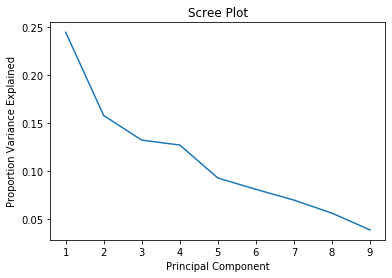

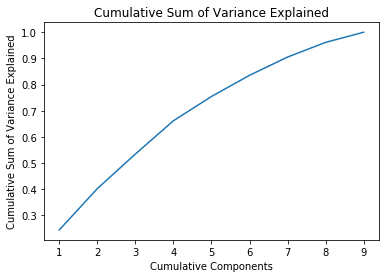

In [0]:
import numpy as np
plt.figure()
explained_var = cluster_pipe.stages[-1].explainedVariance
plt.plot(np.arange(1, len(explained_var)+1), explained_var)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Proportion Variance Explained")

cum_sum = np.cumsum(explained_var)
plt.figure()
plt.plot(np.arange(1, len(explained_var)+1), cum_sum)
plt.title("Cumulative Sum of Variance Explained")
plt.xlabel("Cumulative Components")
plt.ylabel("Cumulative Sum of Variance Explained")

In [0]:
cluster_pipe.stages[-1].explainedVariance

Out[36]: DenseVector([0.2446, 0.1578, 0.1322, 0.1271, 0.0928, 0.081, 0.0697, 0.0561, 0.0387])

In [0]:
'''
import requests
import numpy as np
from pyspark.sql import types

def get_nearest_chars(char, num_nearest_chars):
  cat_idx=StringIndexer(inputCols=('barrels08','displ','fuelCost08','cylinders',"make","model","fuelType",'trany','VClass','youSaveSpend'),outputCols=("bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",'Save/Spend'))
  vec_ass=feature.VectorAssembler(inputCols=["bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx"],outputCol="num_features")
  std_scaler=feature.StandardScaler(withMean=True,inputCol='num_features',outputCol='zfeatures')
  norm = feature.Normalizer(inputCol="zfeatures", outputCol="norm_tfidf", p=2.0)
  pca = feature.PCA(k=2, inputCol='zfeatures', outputCol='PCA_scores')
  vehicle_pipe=Pipeline(stages=[cat_idx,vec_ass,std_scaler,norm,pca]).fit(vehicle_df_1)
  def char_distance(c1,c2):
    return float(np.sqrt((c1 - c2).T.dot((c1 - c2))))

  vehicle_dist_udf=fn.udf(char_distance,types.FloatType())
  spark.sql("SET spark.sql.crossJoin.enabled=TRUE")
  similar_vehicle=vehicle_pipe.transform(vehicle_df_1).where(fn.col("make")==char).select(fn.col("PCA_scores").alias('vehicle_scores')).join(vehicle_pipe.transform(vehicle_df_1)).withColumn('Distance',vehicle_dist_udf('PCA_scores','vehicle_scores')).where('Distance>0').select("make","Distance").orderBy(fn.asc("Distance")).limit(num_nearest_chars).select('make').rdd.map(lambda x:x[0]).collect()
  return similar_vehicle
'''

Out[37]: '\nimport requests\nimport numpy as np\nfrom pyspark.sql import types\n\ndef get_nearest_chars(char, num_nearest_chars):\n cat_idx=StringIndexer(inputCols=(\'barrels08\',\'displ\',\'fuelCost08\',\'cylinders\',"make","model","fuelType",\'trany\',\'VClass\',\'youSaveSpend\'),outputCols=("bar_idx","dis_idx",\'fc_idx\',\'cyl_idx\',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",\'Save/Spend\'))\n vec_ass=feature.VectorAssembler(inputCols=["bar_idx","dis_idx",\'fc_idx\',\'cyl_idx\',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx"],outputCol="num_features")\n std_scaler=feature.StandardScaler(withMean=True,inputCol=\'num_features\',outputCol=\'zfeatures\')\n norm = feature.Normalizer(inputCol="zfeatures", outputCol="norm_tfidf", p=2.0)\n pca = feature.PCA(k=2, inputCol=\'zfeatures\', outputCol=\'PCA_scores\')\n vehicle_pipe=Pipeline(stages=[cat_idx,vec_ass,std_scaler,norm,pca]).fit(vehicle_df_1)\n def char_distance(c1,c2):\n return float(np.sqrt((c1 - c2).T.dot((c1 - c2))))\n\n vehicle_dist_udf=fn.udf(char_distance,types.FloatType())\n spark.sql("SET spark.sql.crossJoin.enabled=TRUE")\n similar_vehicle=vehicle_pipe.transform(vehicle_df_1).where(fn.col("make")==char).select(fn.col("PCA_scores").alias(\'vehicle_scores\')).join(vehicle_pipe.transform(vehicle_df_1)).withColumn(\'Distance\',vehicle_dist_udf(\'PCA_scores\',\'vehicle_scores\')).where(\'Distance>0\').select("make","Distance").orderBy(fn.asc("Distance")).limit(num_nearest_chars).select(\'make\').rdd.map(lambda x:x[0]).collect()\n return similar_vehicle\n'

In [0]:
#print(get_nearest_chars('Ferrari', 5))

In [0]:
from pyspark.sql import Row
from pyspark.sql.functions import  concat
col_list=['make','model']
sample_1=vehicle_df_1
sample_1=sample_1.withColumn('brand',concat(*col_list))
sample_1=sample_1.dropDuplicates(['brand'])
sample_1.show()

+------------------+-----+------+------+---------+----------+---------+----------------+-------------------+--------+------------------+-----------------+--------------------+----+------------+--------------------+
 barrels08|displ|city08|comb08|highway08|fuelCost08|cylinders| make| model|fuelType| co2TailpipeGpm| trany| VClass|year|youSaveSpend| brand|
+------------------+-----+------+------+---------+----------+---------+----------------+-------------------+--------+------------------+-----------------+--------------------+----+------------+--------------------+
19.388823529411766| 2.5| 18| 17| 17| 1850| 4| AM General| DJ Po Vehicle 2WD| Regular| 522.7647058823529| Automatic 3-spd|Special Purpose V...|1984| -3500|AM GeneralDJ Po V...|
25.354615384615386| 4.2| 13| 13| 13| 2400| 6| AM General| FJ8c Post Office| Regular| 683.6153846153846| Automatic 3-spd|Special Purpose V...|1984| -6250|AM GeneralFJ8c Po...|
 20.600625| 2.5| 16| 16| 17| 1950| 4| AM General|Post Office DJ5 2WD| Regular| 555.4375| Automatic 3-spd|Special Purpose V...|1985| -4000|AM GeneralPost Of...|
25.354615384615386| 4.2| 13| 13| 13| 2400| 6| AM General|Post Office DJ8 2WD| Regular| 683.6153846153846| Automatic 3-spd|Special Purpose V...|1985| -6250|AM GeneralPost Of...|
 20.600625| 3.8| 14| 16| 21| 2600| 6|ASC Incorporated| GNX| Premium| 555.4375| Automatic 4-spd| Midsize Cars|1987| -7250| ASC IncorporatedGNX|
 14.98227272727273| 2.3| 19| 22| 27| 1450| 4| Acura| 2.3CL/3.0CL| Regular|403.95454545454544| Automatic 4-spd| Subcompact Cars|1998| -1500| Acura2.3CL/3.0CL|
 16.4805| 2.5| 18| 20| 23| 2050| 5| Acura| 2.5TL| Premium| 444.35| Automatic 4-spd| Compact Cars|1995| -4500| Acura2.5TL|
 16.4805| 3.2| 17| 20| 27| 2050| 6| Acura| 3.2CL| Premium| 444.35| Automatic (S5)| Compact Cars|2001| -4500| Acura3.2CL|
 16.4805| 3.2| 17| 20| 25| 2050| 6| Acura| 3.2TL| Premium| 444.35| Automatic 4-spd| Midsize Cars|1999| -4500| Acura3.2TL|
17.347894736842107| 3.5| 17| 19| 23| 2150| 6| Acura| 3.5RL| Premium| 467.7368421052632| Automatic 4-spd| Midsize Cars|1996| -5000| Acura3.5RL|
12.207777777777778| 2.0| 24| 27| 34| 1550| 4| Acura| ILX| Premium| 322.0| Automatic (S5)| Compact Cars|2013| -2000| AcuraILX|
 8.673947368421054| 1.5| 38| 38| 38| 1100| 4| Acura| ILX Hybrid| Premium| 228.0|Automatic (AV-S7)| Compact Cars|2013| 250| AcuraILX Hybrid|
 13.73375| 1.8| 22| 24| 28| 1700| 4| Acura| Integra| Premium| 370.2916666666667| Manual 5-spd| Subcompact Cars|1994| -2750| AcuraIntegra|
18.311666666666667| 3.2| 16| 18| 21| 2300| 6| Acura| Legend| Premium|493.72222222222223| Automatic 4-spd| Compact Cars|1994| -5750| AcuraLegend|
19.388823529411766| 3.5| 15| 17| 21| 2450| 6| Acura| MDX| Premium| 522.7647058823529| Automatic 5-spd|Sport Utility Veh...|2001| -6500| AcuraMDX|
14.330869565217391| 3.5| 20| 23| 28| 1800| 6| Acura| MDX 2WD| Premium| 390.0| Automatic (S6)|Small Sport Utili...|2014| -3250| AcuraMDX 2WD|
19.388823529411766| 3.5| 15| 17| 21| 2450| 6| Acura| MDX 4WD| Premium| 522.7647058823529| Automatic 5-spd|Sport Utility Veh...|2003| -6500| AcuraMDX 4WD|
 14.98227272727273| 3.5| 19| 22| 26| 1900| 6| Acura| MDX AWD| Premium| 404.0| Automatic (S9)|Small Sport Utili...|2017| -3750| AcuraMDX AWD|
15.695714285714287| 3.5| 19| 21| 25| 1950| 6| Acura| MDX AWD A-SPEC| Premium| 415.0| Automatic (S9)|Small Sport Utili...|2019| -4000| AcuraMDX AWD A-SPEC|
14.330869565217391| 3.5| 20| 23| 27| 1800| 6| Acura| MDX FWD| Premium| 391.0| Automatic (S9)|Small Sport Utili...|2017| -3250| AcuraMDX FWD|
+------------------+-----+------+------+---------+----------+---------+----------------+-------------------+--------+------------------+-----------------+--------------------+----+------------+--------------------+
only showing top 20 rows

In [0]:
import requests
import numpy as np
from pyspark.sql import types

def get_nearest_chars(char, num_nearest_chars):
  cat_idx=StringIndexer(inputCols=('barrels08','displ','fuelCost08','cylinders',"make","model","fuelType",'trany','VClass','youSaveSpend'),outputCols=("bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",'Save/Spend'))
  vec_ass=feature.VectorAssembler(inputCols=["bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx"],outputCol="num_features")
  std_scaler=feature.StandardScaler(withMean=True,inputCol='num_features',outputCol='zfeatures')
  norm = feature.Normalizer(inputCol="zfeatures", outputCol="norm_tfidf", p=2.0)
  pca = feature.PCA(k=2, inputCol='zfeatures', outputCol='PCA_scores')
  vehicle_pipe=Pipeline(stages=[cat_idx,vec_ass,std_scaler,norm,pca]).fit(sample_1)
  def char_distance(c1,c2):
    return float(np.sqrt((c1 - c2).T.dot((c1 - c2))))

  vehicle_dist_udf=fn.udf(char_distance,types.FloatType())
  spark.sql("SET spark.sql.crossJoin.enabled=TRUE")
  similar_vehicle=vehicle_pipe.transform(sample_1).where(fn.col("brand")==char).select(fn.col("PCA_scores").alias('vehicle_scores')).join(vehicle_pipe.transform(sample_1)).withColumn('Distance',vehicle_dist_udf('PCA_scores','vehicle_scores')).where('Distance>0').select("brand","Distance").orderBy(fn.asc("Distance")).limit(num_nearest_chars).select('brand').rdd.map(lambda x:x[0]).collect()
  return similar_vehicle

In [0]:
print(get_nearest_chars('BMW228i xDrive', 30))

['BMW228i', 'BMW230i Convertible', 'BMW230i xDrive Coupe', 'BMW430i Convertible', 'BMW428i Coupe', 'BMW430i Coupe', 'BMW430i Gran Coupe', 'BMW320i xDrive', 'BMW228i xDrive Gran Coupe', 'NissanMurano Hybrid AWD', 'BMW530i xDrive', 'Toyota86', 'AudiA3', 'OldsmobileNinety-Eight II', 'NissanRogue Sport FWD', 'NissanRogue Sport', 'VolkswagenGolf Alltrack', 'VolkswagenGolf SportWagen 4motion', 'NissanMurano Hybrid FWD', 'AcuraMDX Hybrid AWD', 'BMWX1 sDrive28i', 'Mercedes-BenzGLC300 4matic', 'ToyotaCorolla Hatchback', 'InfinitiQX60 Hybrid AWD', 'MazdaMX-5', 'NissanJuke', 'NissanJuke Nismo RS', 'NissanAltima AWD SR/Platinum', 'AcuraTLX 2WD', 'AcuraTLX FWD']

In [0]:
bmw_vehicle=get_nearest_chars('BMW228i xDrive',30)

cat_idx=StringIndexer(inputCols=('barrels08','displ','fuelCost08','cylinders',"make","model","fuelType",'trany','VClass','youSaveSpend'),outputCols=("bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",'Save/Spend'))
vec_ass=feature.VectorAssembler(inputCols=["bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx"],outputCol="num_features")
std_scaler=feature.StandardScaler(withMean=True,inputCol='num_features',outputCol='zfeatures')
norm = feature.Normalizer(inputCol="zfeatures", outputCol="norm_tfidf", p=2.0)
pca = feature.PCA(k=2, inputCol='zfeatures', outputCol='PCA_scores')
vehicle_pipe=Pipeline(stages=[cat_idx,vec_ass,std_scaler,norm,pca]).fit(sample_1)


bmw_X_Pca= vehicle_pipe.transform(sample_1).\
                           where(fn.col('brand').isin(bmw_vehicle)).\
                           select('brand','PCA_scores')

X_bmw=np.array(bmw_X_Pca.rdd.map(lambda x: x['PCA_scores']).collect())
vehicle_name=np.array(bmw_X_Pca.rdd.map(lambda x: x['brand']).collect())


In [0]:

cadi_vehicle=get_nearest_chars('FordLTD',30)

cat_idx=StringIndexer(inputCols=('barrels08','displ','fuelCost08','cylinders',"make","model","fuelType",'trany','VClass','youSaveSpend'),outputCols=("bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",'Save/Spend'))
vec_ass=feature.VectorAssembler(inputCols=["bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx"],outputCol="num_features")
std_scaler=feature.StandardScaler(withMean=True,inputCol='num_features',outputCol='zfeatures')
norm = feature.Normalizer(inputCol="zfeatures", outputCol="norm_tfidf", p=2.0)
pca = feature.PCA(k=2, inputCol='zfeatures', outputCol='PCA_scores')
vehicle_pipe=Pipeline(stages=[cat_idx,vec_ass,std_scaler,norm,pca]).fit(sample_1)


cad_X_Pca= vehicle_pipe.transform(sample_1).\
                           where(fn.col('brand').isin(cadi_vehicle)).\
                           select('brand','PCA_scores')

X_cad=np.array(cad_X_Pca.rdd.map(lambda x: x['PCA_scores']).collect())
cad_vehicle_name=np.array(cad_X_Pca.rdd.map(lambda x: x['brand']).collect())



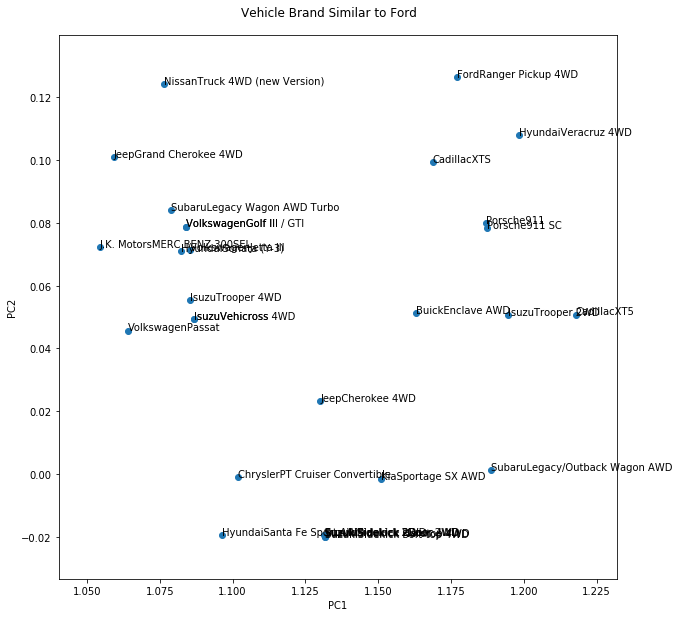

In [0]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.scatter(X_cad[:,0], X_cad[:,1])
fig.suptitle("Vehicle Brand Similar to Ford", y=.92)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
for i, txt in enumerate(cad_vehicle_name):
    ax.annotate(txt, (X_cad[i,0], X_cad[i,1]))
plt.show()

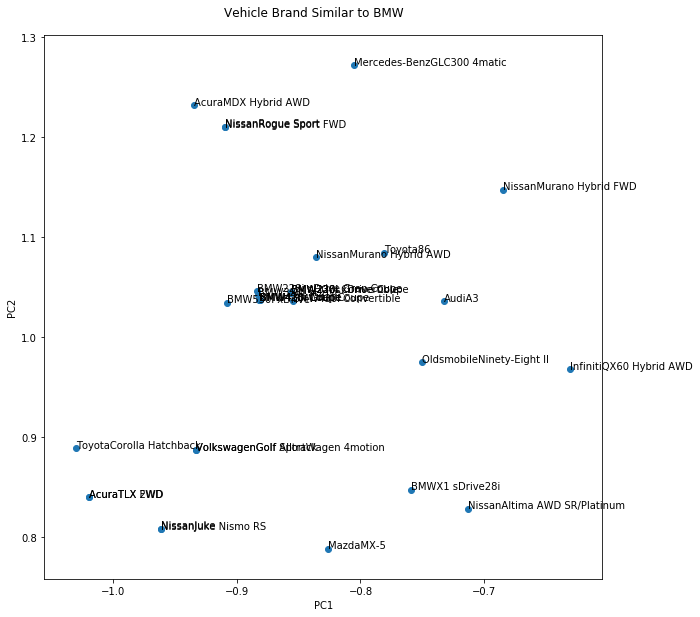

In [0]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.scatter(X_bmw[:,0], X_bmw[:,1])
fig.suptitle("Vehicle Brand Similar to BMW", y=.92)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
for i, txt in enumerate(vehicle_name):
    ax.annotate(txt, (X_bmw[i,0], X_bmw[i,1]))
plt.show()

KMeans Clustering

In [0]:
cat_idx=StringIndexer(inputCols=('barrels08','displ','fuelCost08','cylinders',"make","model","fuelType",'trany','VClass','youSaveSpend'),outputCols=("bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",'Save/Spend'))
vec_ass=feature.VectorAssembler(inputCols=["bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",'Save/Spend'],outputCol="num_features")
std_scaler=feature.StandardScaler(withMean=True,inputCol='num_features',outputCol='zfeatures')
norm = feature.Normalizer(inputCol="zfeatures", outputCol="norm_tfidf", p=2.0)
pca = feature.PCA(k=2, inputCol='zfeatures', outputCol='PCA_scores')

km_pipe=Pipeline(stages=[cat_idx,vec_ass,std_scaler,norm,pca]).fit(vehicle_df_1)


In [0]:
km_model=km_pipe.transform(vehicle_df_1)


In [0]:
km_model.show()

+------------------+-----+------+------+---------+----------+---------+----------+-------------------+--------+------------------+---------------+---------------+----+------------+-------+------+----------+------+---------+-------+-------+--------+--------+----------+--------------------+--------------------+--------------------+--------------------+
 barrels08|displ|city08|comb08|highway08|fuelCost08|cylinders| make| model|fuelType| co2TailpipeGpm| trany| VClass|year|youSaveSpend|dis_idx|fc_idx|Save/Spend|ft_idx|model_idx|bar_idx|cyl_idx|make_idx|tran_idx|Vclass_idx| num_features| zfeatures| norm_tfidf| PCA_scores|
+------------------+-----+------+------+---------+----------+---------+----------+-------------------+--------+------------------+---------------+---------------+----+------------+-------+------+----------+------+---------+-------+-------+--------+--------+----------+--------------------+--------------------+--------------------+--------------------+
15.695714285714287| 2.0| 19| 21| 25| 1500| 4|Alfa Romeo| Spider Veloce 2000| Regular| 423.1904761904762| Manual 5-spd| Two Seaters|1985| -1750| 0.0| 3.0| 3.0| 0.0| 2773.0| 2.0| 0.0| 48.0| 1.0| 5.0|[2.0,0.0,3.0,0.0,...|[-0.5490528266376...|[-0.1374262872668...|[0.91384723430802...|
 29.96454545454546| 4.9| 9| 11| 14| 2850| 12| Ferrari| Testarossa| Regular| 807.9090909090909| Manual 5-spd| Two Seaters|1985| -8500| 31.0| 31.0| 31.0| 0.0| 792.0| 19.0| 4.0| 36.0| 1.0| 5.0|[19.0,31.0,31.0,4...|[0.86541829637724...|[0.17697996663825...|[-3.3398436366843...|
12.207777777777778| 2.2| 23| 27| 33| 1150| 4| Dodge| Charger| Regular|329.14814814814815| Manual 5-spd|Subcompact Cars|1985| 0| 9.0| 20.0| 20.0| 0.0| 46.0| 14.0| 0.0| 2.0| 1.0| 1.0|[14.0,9.0,20.0,0....|[0.44939737784344...|[0.18866928034167...|[-0.5001434286781...|
 29.96454545454546| 5.2| 10| 11| 12| 2850| 8| Dodge|B150/B250 Wagon 2WD| Regular| 807.9090909090909|Automatic 3-spd| Vans|1985| -8500| 21.0| 31.0| 31.0| 0.0| 49.0| 19.0| 2.0| 2.0| 3.0| 12.0|[19.0,21.0,31.0,2...|[0.86541829637724...|[0.23589233893060...|[-2.3058988432310...|
17.347894736842107| 2.2| 17| 19| 23| 2150| 4| Subaru| Legacy AWD Turbo| Premium| 467.7368421052632| Manual 5-spd| Compact Cars|1993| -5000| 9.0| 10.0| 10.0| 1.0| 1719.0| 1.0| 0.0| 15.0| 1.0| 0.0|[1.0,9.0,10.0,0.0...|[-0.6322570103444...|[-0.3140774421247...|[0.18575381839172...|
 14.98227272727273| 1.8| 21| 22| 24| 1450| 4| Subaru| Loyale| Regular|403.95454545454544|Automatic 3-spd| Compact Cars|1993| -1500| 5.0| 6.0| 6.0| 0.0| 1237.0| 4.0| 0.0| 15.0| 3.0| 0.0|[4.0,5.0,6.0,0.0,...|[-0.3826444592241...|[-0.2034198798871...|[0.96243711816354...|
 13.1844| 1.8| 22| 25| 29| 1250| 4| Subaru| Loyale| Regular| 355.48| Manual 5-spd| Compact Cars|1993| -500| 5.0| 14.0| 14.0| 0.0| 1237.0| 11.0| 0.0| 15.0| 1.0| 0.0|[11.0,5.0,14.0,0....|[0.19978482672316...|[0.10909495731548...|[-0.0953501169379...|
 13.73375| 1.6| 23| 24| 26| 1300| 4| Toyota| Corolla| Regular| 370.2916666666667|Automatic 3-spd| Compact Cars|1993| -750| 6.0| 12.0| 12.0| 0.0| 11.0| 10.0| 0.0| 4.0| 3.0| 0.0|[10.0,6.0,12.0,0....|[0.11658064301640...|[0.06066935582238...|[0.47172022106550...|
12.677307692307693| 1.6| 23| 26| 31| 1200| 4| Toyota| Corolla| Regular| 341.8076923076923| Manual 5-spd| Compact Cars|1993| -250| 6.0| 17.0| 17.0| 0.0| 11.0| 13.0| 0.0| 4.0| 1.0| 0.0|[13.0,6.0,17.0,0....|[0.36619319413668...|[0.16541069795308...|[-0.1144300897863...|
 13.1844| 1.8| 23| 25| 30| 1250| 4| Toyota| Corolla| Regular| 355.48|Automatic 4-spd| Compact Cars|1993| -500| 5.0| 14.0| 14.0| 0.0| 11.0| 11.0| 0.0| 4.0| 0.0| 0.0|[11.0,5.0,14.0,0....|[0.19978482672316...|[0.09369484819731...|[0.34187507596817...|
12.677307692307693| 1.8| 23| 26| 30| 1200| 4| Toyota| Corolla| Regular| 341.8076923076923| Manual 5-spd| Compact Cars|1993| -250| 5.0| 17.0| 17.0| 0.0| 11.0| 13.0| 0.0| 4.0| 1.0| 0.0|[13.0,5.0,17.0,0....|[0.36619319413668...|[0.16391780707555...|[-0.0999041848486...|
15.695714285714287| 2.0| 18| 21| 26| 1500| 4|Volkswagen| Golf III / GTI| Regular

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

silhouette_coeff=[]
for i in range(3,9):
  kmeans = KMeans(featuresCol="norm_tfidf").setK(i).setSeed(1)
  model = kmeans.fit(km_model)
  predictions = model.transform(km_model)
  evaluator = ClusteringEvaluator(featuresCol="norm_tfidf",predictionCol="prediction")
  silh_score=evaluator.evaluate(predictions)
  silhouette_coeff.append(silh_score)
#7

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-144803085465614> in <module> 
 10 silh_score = evaluator . evaluate ( predictions ) 
 11 silhouette_coeff . append ( silh_score ) 
 ---> 12 display ( silhouette_coeff ) 
 13 #7 

 /local_disk0/tmp/1606687687162-0/PythonShell.py in display (self, input, *args, **kwargs) 
 1366 self . displayRDD = input . _jdf
 1367 elif isinstance ( input , list ) : 
 -> 1368 listDisplay = self . sparkSession . createDataFrame ( input ) . _jdf
 1369 if self . enableListResults : 
 1370 self . appendResults ( "table" , listDisplay ) 

 /databricks/spark/python/pyspark/databricks/utils/instrumentation.py in wrapper (self, *args, **kwargs) 
 40 try : 
 41 start_time = time . time ( ) 
 ---> 42 return_val = func ( self , * args , ** kwargs ) 
 43 except Exception : 
 44 duration = ( time . time ( ) - start_time ) * 1000 

 /databricks/spark/python/pyspark/sql/session.py in createDataFrame (self, data, schema, samplingRatio, verifySchema) 
 656 return super(SparkSession, self).createDataFrame(
 657 data, schema, samplingRatio, verifySchema)
 --> 658 return self . _create_dataframe ( data , schema , samplingRatio , verifySchema ) 
 659 
 660 def _create_dataframe ( self , data , schema , samplingRatio , verifySchema ) : 

 /databricks/spark/python/pyspark/sql/session.py in _create_dataframe (self, data, schema, samplingRatio, verifySchema) 
 688 rdd , schema = self . _createFromRDD ( data . map ( prepare ) , schema , samplingRatio ) 
 689 else : 
 --> 690 rdd , schema = self . _createFromLocal ( map ( prepare , data ) , schema ) 
 691 jrdd = self . _jvm . SerDeUtil . toJavaArray ( rdd . _to_java_object_rdd ( ) ) 
 692 jdf = self . _jsparkSession . applySchemaToPythonRDD ( jrdd . rdd ( ) , schema . json ( ) ) 

 /databricks/spark/python/pyspark/sql/session.py in _createFromLocal (self, data, schema) 
 472 write temp files . 
 473 """
 --> 474 data , schema = self . _wrap_data_schema ( data , schema ) 
 475 return self . _sc . parallelize ( data ) , schema
 476 

 /databricks/spark/python/pyspark/sql/session.py in _wrap_data_schema (self, data, schema) 
 451 
 452 if schema is None or isinstance ( schema , ( list , tuple ) ) : 
 --> 453 struct = self . _inferSchemaFromList ( data , names = schema ) 
 454 converter = _create_converter ( struct ) 
 455 data = map ( converter , data ) 

 /databricks/spark/python/pyspark/sql/session.py in _inferSchemaFromList (self, data, names) 
 387 warnings.warn("inferring schema from dict is deprecated,"
 388 "please use pyspark.sql.Row instead")
 --> 389 schema = reduce ( _merge_type , ( _infer_schema ( row , names ) for row in data ) ) 
 390 if _has_nulltype ( schema ) : 
 391 raise ValueError ( "Some of types cannot be determined after inferring" ) 

 /databricks/spark/python/pyspark/sql/session.py in <genexpr> (.0) 
 387 warnings.warn("inferring schema from dict is deprecated,"
 388 "please use pyspark.sql.Row instead")
 --> 389 schema = reduce ( _merge_type , ( _infer_schema ( row , names ) for row in data ) ) 
 390 if _has_nulltype ( schema ) : 
 391 raise ValueError ( "Some of types cannot be determined after inferring" ) 

 /databricks/spark/python/pyspark/sql/types.py in _infer_schema (row, names) 
 1065 
 1066 else : 
 -> 1067 raise TypeError ( "Can not infer schema for type: %s" % type ( row ) ) 
 1068 
 1069 fields = [ StructField ( k , _infer_type ( v ) , True ) for k , v in items ] 

 TypeError : Can not infer schema for type: <class 'float'>

In [0]:
print(silhouette_coeff)

[0.2681663964941964, 0.26550222919218175, 0.2809775102740739, 0.27927741241335896, 0.26591751606709163, 0.2920745128246736]

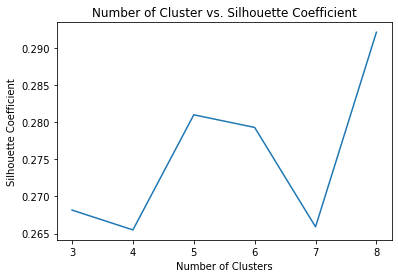

In [0]:
plt.plot(range(3,9), silhouette_coeff)
plt.xticks(range(3, 9))
plt.title("Number of Cluster vs. Silhouette Coefficient")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [0]:
X = np.array(km_model.select('PCA_scores').rdd.map(lambda x: x['PCA_scores']).collect())


In [0]:
cat_idx=StringIndexer(inputCols=('barrels08','displ','fuelCost08','cylinders',"make","model","fuelType",'trany','VClass','youSaveSpend'),outputCols=("bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",'Save/Spend'))
vec_ass=feature.VectorAssembler(inputCols=["bar_idx","dis_idx",'fc_idx','cyl_idx',"make_idx","model_idx","ft_idx","tran_idx","Vclass_idx",'Save/Spend'],outputCol="num_features")
std_scaler=feature.StandardScaler(withMean=True,inputCol='num_features',outputCol='zfeatures')
norm = feature.Normalizer(inputCol="zfeatures", outputCol="norm_tfidf", p=2.0)
pca = feature.PCA(k=2, inputCol='zfeatures', outputCol='PCA_scores')

km_pipe=Pipeline(stages=[cat_idx,vec_ass,std_scaler,norm,pca]).fit(sample_1)
cluster_plot_model=km_pipe.transform(sample_1)

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

kmeans = KMeans(featuresCol="norm_tfidf",k=7,seed=1)
kmeans_model = kmeans.fit(cluster_plot_model)
kmeans_predictions = kmeans_model.transform(cluster_plot_model)
evaluator = ClusteringEvaluator(featuresCol="norm_tfidf",predictionCol="prediction")
kmeans_label=kmeans_predictions.select('prediction')


In [0]:
manufacturer = np.array(cluster_plot_model.select('brand').rdd.map(lambda x: x['brand']).collect())
X_2 = np.array(cluster_plot_model.select('PCA_scores').rdd.map(lambda x: x['PCA_scores']).collect())
km_label=np.array(kmeans_predictions.select('prediction').rdd.map(lambda x:x['prediction']).collect())

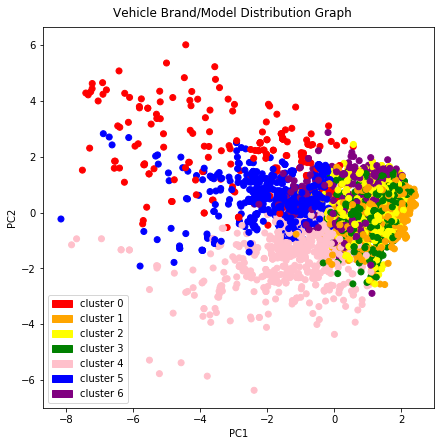

In [0]:
color_map = {0:"red",1:"orange",2:"yellow",3:"green",4:"pink",5:"blue",6:"purple"}
label_color = [color_map[l] for l in km_label]

fig, ax = plt.subplots()
fig.set_figheight(7) 
fig.set_figwidth(7)
ax.scatter(X_2[:,0], X_2[:,1],c=label_color,cmap=plt.cm.Paired)
fig.suptitle("Vehicle Brand/Model Distribution Graph", y=.92)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='cluster 0')
oran=mpatches.Patch(color='orange', label='cluster 1')
yello=mpatches.Patch(color='yellow', label='cluster 2')
green=mpatches.Patch(color='green', label='cluster 3')
pink=mpatches.Patch(color='pink', label='cluster 4')
blue=mpatches.Patch(color='blue', label='cluster 5')
pur=mpatches.Patch(color='purple', label='cluster 6')
plt.legend(handles=[red_patch,oran,yello,green,pink,blue,pur],loc=3)


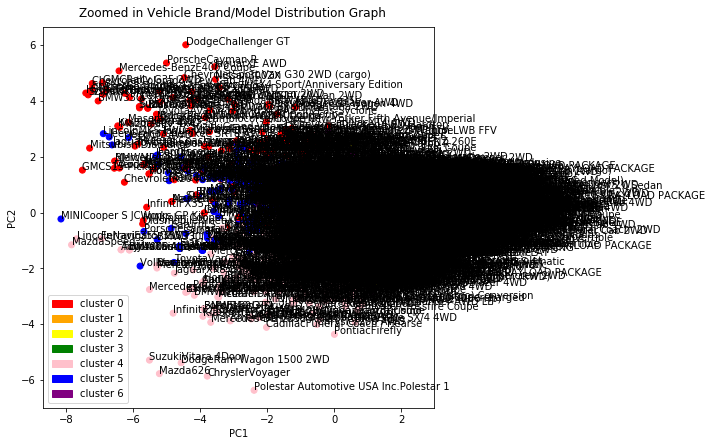

In [0]:
color_map = {0:"red",1:"orange",2:"yellow",3:"green",4:"pink",5:"blue",6:"purple"}
label_color = [color_map[l] for l in km_label]

fig, ax = plt.subplots()
fig.set_figheight(7) 
fig.set_figwidth(7)
ax.scatter(X_2[:,0], X_2[:,1],c=label_color,cmap=plt.cm.Paired)
fig.suptitle("Zoomed in Vehicle Brand/Model Distribution Graph", y=.92)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")


for i, txt in enumerate(manufacturer):
    ax.annotate(txt, (X_2[i,0], X_2[i,1]))
plt.legend(handles=[red_patch,oran,yello,green,pink,blue,pur],loc=3)
plt.show()

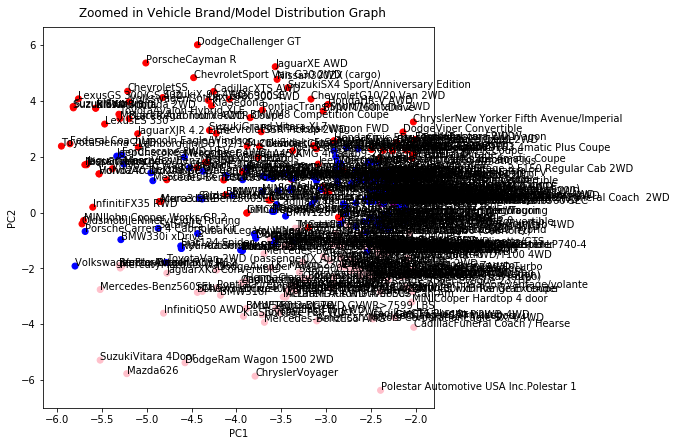

In [0]:
idx = (X_2[:, 0]>-6)&(X_2[:, 0]<-2)
X_2 = X_2[idx]
manufacturer = manufacturer[idx]
km_label=km_label[idx]

color_map = {0:"red",1:"orange",2:"yellow",3:"green",4:"pink",5:"blue",6:"purple"}
label_color = [color_map[l] for l in km_label]

fig, ax = plt.subplots()
fig.set_figheight(7) 
fig.set_figwidth(7)
ax.scatter(X_2[:,0], X_2[:,1],c=label_color,cmap=plt.cm.Paired)
fig.suptitle("Zoomed in Vehicle Brand/Model Distribution Graph", y=.92)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")


for i, txt in enumerate(manufacturer):
    ax.annotate(txt, (X_2[i,0], X_2[i,1]))
plt.show()

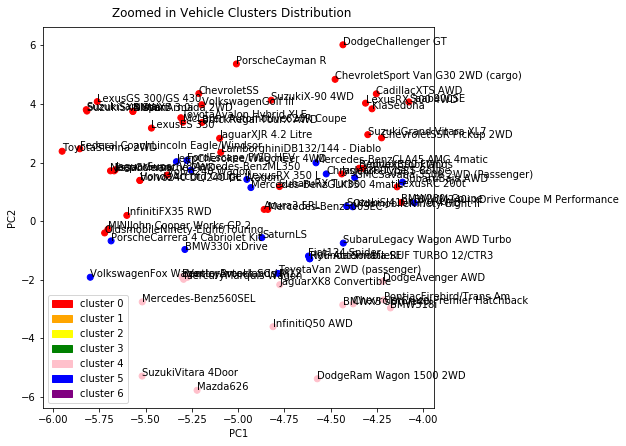

In [0]:
idx = (X_2[:, 0]>-6)&(X_2[:, 0]<-4)
X_2 = X_2[idx]
manufacturer = manufacturer[idx]
km_label=km_label[idx]

color_map = {0:"red",1:"orange",2:"yellow",3:"green",4:"pink",5:"blue",6:"purple"}
label_color = [color_map[l] for l in km_label]

fig, ax = plt.subplots()
fig.set_figheight(7) 
fig.set_figwidth(7)
ax.scatter(X_2[:,0], X_2[:,1],c=label_color,cmap=plt.cm.Paired)
fig.suptitle("Zoomed in Vehicle Clusters Distribution", y=.92)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")


for i, txt in enumerate(manufacturer):
    ax.annotate(txt, (X_2[i,0], X_2[i,1]))
plt.legend(handles=[red_patch,oran,yello,green,pink,blue,pur],loc=3)
plt.show()

**Bar Graph**

In [0]:
vehicle_df.show()

+------------------+----------+---------+---------+------+-------+-------+--------+------+-----+------+---+----+---------------+------------------+------+-------+-------+--------+-----+----------+----------+---------+-----+--------------------+-----+----------+-------+----------+-----------+--------+----------------+--------+---------+---------+----------+----------+-----------+---------+--------+---------+---+---+-----+---+---+----------+-------------------+-------+-----------+---+---+-----+---------+----------+--------+---------+---------------+-------+------+--------+---------+---------------+----+------------+-------+-----------+--------+--------+-------+---------+------+-------+-------+--------+----------+---------+--------------------+--------------------+---------+--------+-------+--------+
 barrels08|barrelsA08|charge120|charge240|city08|city08U|cityA08|cityA08U|cityCD|cityE|cityUF|co2|co2A|co2TailpipeAGpm| co2TailpipeGpm|comb08|comb08U|combA08|combA08U|combE|combinedCD|combinedUF|cylinders|displ| drive|engId| eng_dscr|feScore|fuelCost08|fuelCostA08|fuelType| fuelType1|ghgScore|ghgScoreA|highway08|highway08U|highwayA08|highwayA08U|highwayCD|highwayE|highwayUF|hlv|hpv| id|lv2|lv4| make| model|mpgData|phevBlended|pv2|pv4|range|rangeCity|rangeCityA|rangeHwy|rangeHwyA| trany| UCity|UCityA|UHighway|UHighwayA| VClass|year|youSaveSpend|guzzler| trans_dscr|tCharger|sCharger|atvType|fuelType2|rangeA|evMotor|mfrCode|c240Dscr|charge240b|c240bDscr| createdOn| modifiedOn|startStop|phevCity|phevHwy|phevComb|
+------------------+----------+---------+---------+------+-------+-------+--------+------+-----+------+---+----+---------------+------------------+------+-------+-------+--------+-----+----------+----------+---------+-----+--------------------+-----+----------+-------+----------+-----------+--------+----------------+--------+---------+---------+----------+----------+-----------+---------+--------+---------+---+---+-----+---+---+----------+-------------------+-------+-----------+---+---+-----+---------+----------+--------+---------+---------------+-------+------+--------+---------+---------------+----+------------+-------+-----------+--------+--------+-------+---------+------+-------+-------+--------+----------+---------+--------------------+--------------------+---------+--------+-------+--------+
15.695714285714287| 0.0| 0.0| 0.0| 19| 0.0| 0| 0.0| 0.0| 0.0| 0.0| -1| -1| 0.0| 423.1904761904762| 21| 0.0| 0| 0.0| 0.0| 0.0| 0.0| 4| 2.0| Rear-Wheel Drive| 9011| (FFS)| -1| 1500| 0| Regular|Regular Gasoline| -1| -1| 25| 0.0| 0| 0.0| 0.0| 0.0| 0.0| 0| 0| 1| 0| 0|Alfa Romeo| Spider Veloce 2000| Y| false| 0| 0| 0| 0.0| 0.0| 0.0| 0.0| Manual 5-spd|23.3333| 0.0| 35.0| 0.0| Two Seaters|1985| -1750| null| null| null| null| null| null| null| null| null| null| 0.0| null|Tue Jan 01 00:00:...|Tue Jan 01 00:00:...| null| 0| 0| 0|
 29.96454545454546| 0.0| 0.0| 0.0| 9| 0.0| 0| 0.0| 0.0| 0.0| 0.0| -1| -1| 0.0| 807.9090909090909| 11| 0.0| 0| 0.0| 0.0| 0.0| 0.0| 12| 4.9| Rear-Wheel Drive|22020| (GUZZLER)| -1| 2850| 0| Regular|Regular Gasoline| -1| -1| 14| 0.0| 0| 0.0| 0.0| 0.0| 0.0| 0| 0| 10| 0| 0| Ferrari| Testarossa| N| false| 0| 0| 0| 0.0| 0.0| 0.0| 0.0| Manual 5-spd| 11.0| 0.0| 19.0| 0.0| Two Seaters|1985| -8500| T| null| null| null| null| null| null| null| null| null| 0.0| null|Tue Jan 01 00:00:...|Tue Jan 01 00:00:...| null| 0| 0| 0|
12.207777777777778| 0.0| 0.0| 0.0| 23| 0.0| 0| 0.0| 0.0| 0.0| 0.0| -1| -1| 0.0|329.14814814814815| 27| 0.0| 0| 0.0| 0.0| 0.0| 0.0| 4| 2.2| Front-Wheel Drive| 2100| (FFS)| -1| 1150| 0| Regular|Regular Gasoline| -1| -1| 33| 0.0| 0| 0.0| 0.0| 0.0| 0.0| 19| 77| 100| 0| 0| Dodge| Charger| Y| false| 0| 0| 0| 0.0| 0.0| 0.0| 0.0| Manual 5-spd| 29.0| 0.0| 47.0| 0.0|Subcompact Cars|1985| 0| null| SIL| null| null| null| null| null| null| null| null| 0.0| null|Tue Jan 01 00:00:...|Tue Jan 01 00:00:...| null| 0| 0| 0|
 29.96454545454546| 0.0| 0.0| 0.0| 10| 0.0| 0| 0.0| 0.0| 0.0| 0.0| -1| -1| 0.0| 807.9090909090909| 11| 0.0| 0| 0

In [0]:
 
filter_df=vehicle_df_1.filter(vehicle_df_1.youSaveSpend>0)
filter_df.show()
filter_df.count()

+------------------+-----+------+------+---------+----------+---------+---------+-------------+--------+------------------+---------------+--------------------+----+------------+
 barrels08|displ|city08|comb08|highway08|fuelCost08|cylinders| make| model|fuelType| co2TailpipeGpm| trany| VClass|year|youSaveSpend|
+------------------+-----+------+------+---------+----------+---------+---------+-------------+--------+------------------+---------------+--------------------+----+------------+
11.771785714285713| 1.9| 25| 28| 33| 1100| 4| Ford| Escort Wagon| Regular|317.39285714285717| Manual 5-spd|Small Station Wagons|1993| 250|
11.771785714285713| 1.9| 25| 28| 33| 1100| 4| Mercury| Tracer Wagon| Regular|317.39285714285717| Manual 5-spd|Small Station Wagons|1993| 250|
11.771785714285713| 1.9| 24| 28| 33| 1100| 4| Saturn| SW| Regular|317.39285714285717| Manual 5-spd|Small Station Wagons|1993| 250|
 9.694411764705883| 1.5| 31| 34| 37| 950| 4| Dodge| Colt| Regular|261.38235294117646| Manual 4-spd| Subcompact Cars|1985| 1000|
 10.987| 1.5| 27| 30| 35| 1050| 4| Dodge| Colt| Regular|296.23333333333335| Manual 5-spd| Subcompact Cars|1985| 500|
11.771785714285713| 1.5| 25| 28| 33| 1100| 4| Honda|Civic Del Sol| Regular|317.39285714285717|Automatic 4-spd| Two Seaters|1994| 250|
 9.988181818181818| 1.5| 30| 33| 37| 950| 4| Honda|Civic Del Sol| Regular| 269.3030303030303| Manual 5-spd| Two Seaters|1994| 1000|
11.771785714285713| 1.6| 25| 28| 32| 1100| 4| Honda|Civic Del Sol| Regular|317.39285714285717| Manual 5-spd| Two Seaters|1994| 250|
 9.988181818181818| 1.0| 31| 33| 36| 950| 3|Chevrolet| Sprint| Regular| 269.3030303030303|Automatic 3-spd| Subcompact Cars|1994| 1000|
 8.039268292682927| 1.0| 38| 41| 45| 750| 3|Chevrolet| Sprint| Regular| 216.7560975609756| Manual 5-spd| Subcompact Cars|1994| 2000|
11.771785714285713| 1.6| 25| 28| 34| 1100| 4| Nissan| Sentra| Regular|317.39285714285717| Manual 5-spd| Subcompact Cars|1994| 250|
 10.63258064516129| 1.5| 28| 31| 35| 1000| 4| Dodge| Colt| Regular| 286.6774193548387| Manual 5-spd| Subcompact Cars|1994| 750|
 10.63258064516129| 1.5| 28| 31| 35| 1000| 4| Eagle| Summit| Regular| 286.6774193548387| Manual 5-spd| Subcompact Cars|1994| 750|
 9.694411764705883| 1.3| 31| 34| 39| 950| 4| Ford| Aspire| Regular|261.38235294117646| Manual 5-spd| Subcompact Cars|1994| 1000|
 9.988181818181818| 1.0| 31| 33| 35| 950| 3| Geo| Metro| Regular| 269.3030303030303|Automatic 3-spd| Subcompact Cars|1994| 1000|
 8.24025| 1.0| 38| 40| 44| 800| 3| Geo| Metro| Regular| 222.175| Manual 5-spd| Subcompact Cars|1994| 1750|
 7.012978723404256| 1.0| 43| 47| 52| 650| 3| Geo| Metro XFI| Regular|189.08510638297872| Manual 5-spd| Subcompact Cars|1994| 2500|
11.771785714285713| 1.5| 25| 28| 33| 1100| 4| Honda| Civic| Regular|317.39285714285717|Automatic 4-spd| Subcompact Cars|1994| 250|
 8.673947368421054| 1.5| 35| 38| 41| 850| 4| Honda| Civic| Regular| 233.8684210526316| Manual 5-spd| Subcompact Cars|1994| 1500|
 9.155833333333334| 1.5| 33| 36| 41| 900| 4| Honda| Civic| Regular|246.86111111111111| Manual 5-spd| Subcompact Cars|1994| 1250|
+------------------+-----+------+------+---------+----------+---------+---------+-------------+--------+------------------+---------------+--------------------+----+------------+
only showing top 20 rows

Out[60]: 2986

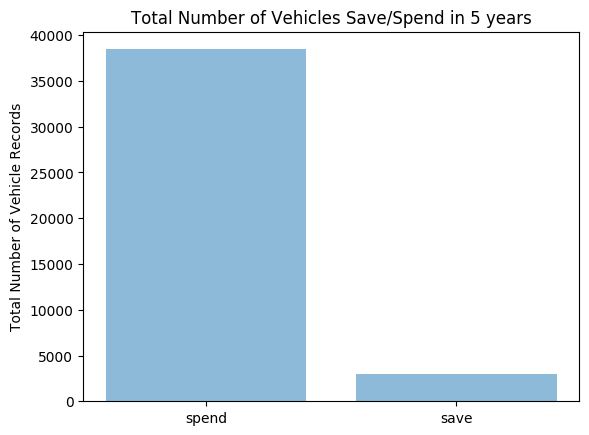

In [0]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects=('spend',"save")
y_pos=np.arange(len(objects))
count_total=[38447,2986]

plt.bar(y_pos, count_total, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Total Number of Vehicle Records')
plt.title("Total Number of Vehicles Save/Spend in 5 years")
